## Сюй Минчуань, гр. 517, задание 7 домашки 1
- Постройте график кумулятивного распределения полных степеней вершин этого графа в логарифмических координатах. 
- Аппроксимируйте «основную» часть графика степенным законом $c/d^{\gamma}$. 
- Постройте на том же графике полученную функцию.

In [13]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

In [3]:
# testing nx
G = nx.petersen_graph()
print(G.number_of_nodes(), G.number_of_edges())

10 15


In [4]:
G = nx.read_edgelist("graph.txt")

In [6]:
print(G.number_of_nodes(),G.number_of_edges())

875713 4322051


In [7]:
from collections import defaultdict
degrees = defaultdict(int)

for v in G.nodes():
    d = G.degree(v)
    degrees[d] += 1

cd = defaultdict(int)
s = 0 
for d in sorted(degrees.keys(), reverse = True):
    s += degrees[d]
    cd[d] = s

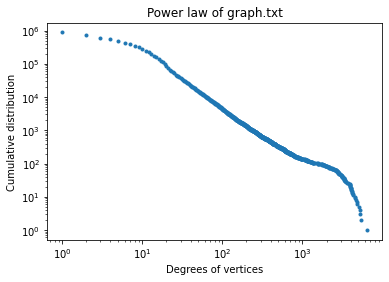

In [11]:
x = sorted(cd.keys())
y = [cd[d] for d in x]
plt.loglog(x, y, ls='None', marker='.')
plt.ylabel("Cumulative distribution")
plt.xlabel("Degrees of vertices")
plt.title("Power law of graph.txt")
plt.show()

In [24]:
x_main = [i for i in x if i >= 1e1 and i <= 1e3]
y_main = [cd[d] for d in x_main]

def power_law(d, c, gamma):
    return c / np.power(d,gamma)

popt, _ = curve_fit(power_law, x_main , y_main)

array([1.90022089e+07, 1.80566480e+00])

The parameters in Power Law for the data is c = 1.90022089e+07, d = 1.80566480e+00.

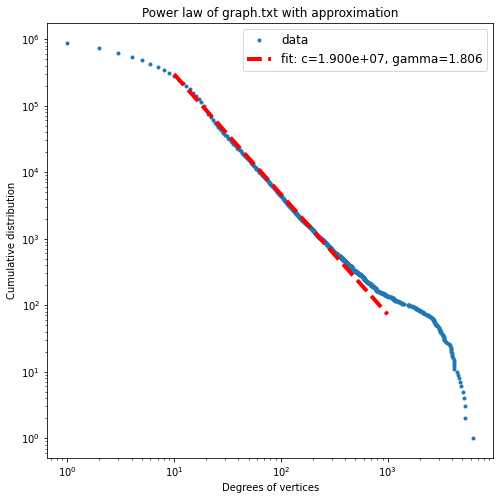

In [34]:
plt.figure(figsize=(8,8))
plt.loglog(x, y, ls='None', marker='.',label = "data" )
plt.loglog(x_main, power_law(x_main, *popt), 'r--', linewidth = 4, label = 'fit: c=%.3e, gamma=%.3f' % tuple(popt))
plt.ylabel("Cumulative distribution")
plt.xlabel("Degrees of vertices")
plt.title("Power law of graph.txt with approximation")
plt.legend(fontsize = 'large')
plt.show()